In [2]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [3]:
print('Total amount of files in SMNI_CMI_TRAIN directory: ' + str(len(os.listdir('../../../Downloads/archive/SMNI_CMI_TRAIN/'))))

Total amount of files in SMNI_CMI_TRAIN directory: 470


In [10]:
filenames_list = os.listdir('../../../Downloads/archive/SMNI_CMI_TRAIN/') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file

for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('../../../Downloads/archive/SMNI_CMI_TRAIN/' + file_name) ## read from the file to df
    EEG_data = EEG_data.append(temp_df) ## add the file data to the main df
    
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

  0%|          | 0/470 [00:00<?, ?it/s]


AttributeError: 'DataFrame' object has no attribute 'append'

In [11]:
EEG_data_list = []

for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('../../../Downloads/archive/SMNI_CMI_TRAIN/' + file_name)
    EEG_data_list.append(temp_df)

EEG_data = pd.concat(EEG_data_list, ignore_index=True)

 11%|█▏        | 53/470 [00:00<00:07, 54.03it/s]


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [4]:
import pandas as pd
import os

# Assuming your filenames_list is correct and contains the list of filenames
filenames_list = os.listdir('../../../Downloads/archive/SMNI_CMI_TRAIN/') 

# Just pick one file, for example the first one in the list
single_file_name = filenames_list[0]

# Read the single file into a DataFrame
single_file_path = f'../../../Downloads/archive/SMNI_CMI_TRAIN/{single_file_name}'
single_EEG_data = pd.read_csv(single_file_path)

# If the file has an 'Unnamed: 0' column, drop it
if 'Unnamed: 0' in single_EEG_data.columns:
    single_EEG_data = single_EEG_data.drop(['Unnamed: 0'], axis=1)

# If there's a need to replace values in 'matching condition', do so
single_EEG_data.loc[single_EEG_data['matching condition'] == 'S2 nomatch,', 'matching_condition'] = 'S2 nomatch'

# Display the first few rows of the DataFrame
print(single_EEG_data.head())

   trial number sensor position  sample num  sensor value subject identifier  \
0            19             FP1           0         6.887                  c   
1            19             FP1           1         2.004                  c   
2            19             FP1           2        -1.414                  c   
3            19             FP1           3        -2.391                  c   
4            19             FP1           4         0.051                  c   

  matching condition  channel         name      time matching_condition  
0        S2 nomatch,        0  co2c0000340  0.000000         S2 nomatch  
1        S2 nomatch,        0  co2c0000340  0.003906         S2 nomatch  
2        S2 nomatch,        0  co2c0000340  0.007812         S2 nomatch  
3        S2 nomatch,        0  co2c0000340  0.011719         S2 nomatch  
4        S2 nomatch,        0  co2c0000340  0.015625         S2 nomatch  


In [7]:
filenames_list = os.listdir('../../../Downloads/archive/SMNI_CMI_TRAIN/') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file

for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('../../../Downloads/archive/SMNI_CMI_TRAIN/' + file_name) ## read from the file to df
    EEG_data = EEG_data.append(temp_df) ## add the file data to the main df

  0%|          | 0/470 [00:00<?, ?it/s]


AttributeError: 'DataFrame' object has no attribute 'append'

In [6]:
EEG_data_list = []

for file_name in tqdm(filenames_list):
    try:
        temp_df = pd.read_csv('../../../Downloads/archive/SMNI_CMI_TRAIN/' + file_name, encoding='ISO-8859-1')
        EEG_data_list.append(temp_df)
    except Exception as e:
        print(f"An error occurred while reading {file_name}: {e}")

EEG_data = pd.concat(EEG_data_list, ignore_index=True)

  0%|          | 0/470 [00:00<?, ?it/s]

 74%|███████▍  | 349/470 [00:06<00:02, 58.43it/s]

An error occurred while reading Train: [Errno 21] Is a directory: '../../../Downloads/archive/SMNI_CMI_TRAIN/Train'


100%|██████████| 470/470 [00:08<00:00, 53.21it/s]


In [7]:
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

In [8]:
EEG_data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,19.0,FP1,0.0,6.887,c,S2 nomatch,0.0,co2c0000340,0.000000
1,19.0,FP1,1.0,2.004,c,S2 nomatch,0.0,co2c0000340,0.003906
2,19.0,FP1,2.0,-1.414,c,S2 nomatch,0.0,co2c0000340,0.007812
3,19.0,FP1,3.0,-2.391,c,S2 nomatch,0.0,co2c0000340,0.011719
4,19.0,FP1,4.0,0.051,c,S2 nomatch,0.0,co2c0000340,0.015625


In [9]:
## replace some 'sensor position' values
EEG_data.loc[EEG_data['sensor position'] == 'AF1', 'sensor position'] = 'AF3'
EEG_data.loc[EEG_data['sensor position'] == 'AF2', 'sensor position'] = 'AF4'
EEG_data.loc[EEG_data['sensor position'] == 'PO1', 'sensor position'] = 'PO3'
EEG_data.loc[EEG_data['sensor position'] == 'PO2', 'sensor position'] = 'PO4'
## remove rows with undefined positions
EEG_data = EEG_data[(EEG_data['sensor position'] != 'X') & (EEG_data['sensor position'] != 'Y') & (EEG_data['sensor position'] != 'nd')]

In [10]:
def sample_data(stimulus, random_id=random.randint(0,7)):
    """Function merged data frame - one data frame for randomly selected subject from control group and 
    one data frame for randomly selected subject from alcoholic group"""
    ## random choose the name_id of subject from alcoholic/control group
    alcoholic_id = EEG_data['name'][(EEG_data['subject identifier'] == 'a') & 
                                    (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    control_id = EEG_data['name'][(EEG_data['subject identifier'] == 'c') & 
                                  (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    
    ## get min trial numbers for each group
    alcoholic_trial_number = EEG_data['trial number'][(EEG_data['name'] == alcoholic_id) & (EEG_data['matching condition'] == stimulus)].min()
    control_trial_number = EEG_data['trial number'][(EEG_data['name'] == control_id) & (EEG_data['matching condition'] == stimulus)].min()

    ## filter the EEG DF
    alcoholic_df = EEG_data[(EEG_data['name'] == alcoholic_id) & (EEG_data['trial number'] == alcoholic_trial_number)]
    control_df = EEG_data[(EEG_data['name'] == control_id) & (EEG_data['trial number'] == control_trial_number)]
    
    return pd.concat([alcoholic_df, control_df], ignore_index=True)

In [11]:
merged_data = sample_data("S2 match")
print(merged_data.head())

   trial number sensor position  sample num  sensor value subject identifier  \
0           3.0             FP1         0.0         4.812                  a   
1           3.0             FP1         1.0         2.858                  a   
2           3.0             FP1         2.0         1.394                  a   
3           3.0             FP1         3.0         1.882                  a   
4           3.0             FP1         4.0         3.347                  a   

  matching condition  channel         name      time  
0           S2 match      0.0  co2a0000375  0.000000  
1           S2 match      0.0  co2a0000375  0.003906  
2           S2 match      0.0  co2a0000375  0.007812  
3           S2 match      0.0  co2a0000375  0.011719  
4           S2 match      0.0  co2a0000375  0.015625  


In [12]:
sensor_positions = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['sensor position']
channels = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['channel']

def plot_3dSurface_and_heatmap(stimulus, group, df):
    
    if group == 'c':
        group_name = 'Control'
    else:
        group_name = 'Alcoholic'
        
    temp_df = pd.pivot_table(df[['channel', 'sample num', 'sensor value']][(df['subject identifier'] == group) & (df['matching condition'] == stimulus)],
                                          index='channel', columns='sample num', values='sensor value').values.tolist()
    data = [go.Surface(z=temp_df, colorscale='Bluered')]

    layout = go.Layout(
        title='<br>3d Surface and Heatmap of Sensor Values for ' + stimulus + ' Stimulus for ' + group_name + ' Group',
        width=800,
        height=900,
        autosize=False,
        margin=dict(t=0, b=0, l=0, r=0),
        scene=dict(
            xaxis=dict(
                title='Time (sample num)',
                gridcolor='rgb(255, 255, 255)',
    #             erolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='Channel',
                tickvals=channels,
                ticktext=sensor_positions,
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230, 230)'
            ),
            zaxis=dict(
                title='Sensor Value',
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            aspectratio = dict(x=1, y=1, z=0.5),
            aspectmode = 'manual'
        )
    )

    updatemenus=list([
        dict(
            buttons=list([   
                dict(
                    args=['type', 'surface'],
                    label='3D Surface',
                    method='restyle'
                ),
                dict(
                    args=['type', 'heatmap'],
                    label='Heatmap',
                    method='restyle'
                )             
            ]),
            direction = 'left',
            pad = {'r': 10, 't': 10},
            showactive = True,
            type = 'buttons',
            x = 0.1,
            xanchor = 'left',
            y = 1.1,
            yanchor = 'top' 
        ),
    ])

    annotations = list([
        dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
    ])
    layout['updatemenus'] = updatemenus
    layout['annotations'] = annotations

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [38]:
stimulus = 'S1 obj'
S1_sample_df = sample_data(stimulus=stimulus, random_id=1)

In [39]:
plot_3dSurface_and_heatmap(stimulus=stimulus, group='a', df=S1_sample_df)

In [15]:
plot_3dSurface_and_heatmap(stimulus=stimulus, group='c', df=S1_sample_df)

In [16]:
topotest = pd.read_csv("https://raw.githubusercontent.com/craddm/ExploringERPs/master/topographyTest.csv")
topotest = topotest.melt(id_vars=['Times'], var_name='electrode', value_name='amplitude')
electrodeLocs = pd.read_csv("https://raw.githubusercontent.com/craddm/ExploringERPs/master/biosemi70elecs.loc", 
                            delimiter='\t', names=["chanNo", "theta", "radius", "electrode"])

In [24]:
topotest.head()

,Times,electrode,amplitude
0,-200.20,Fp1,0.77280
1,-199.22,Fp1,0.70987
2,-198.24,Fp1,0.65099
3,-197.27,Fp1,0.63708
4,-196.29,Fp1,0.60768


In [19]:
electrodeLocs['radianTheta'] = np.radians(electrodeLocs['theta'])
electrodeLocs['x'] = electrodeLocs['radius'] * np.sin(electrodeLocs['radianTheta'])
electrodeLocs['y'] = electrodeLocs['radius'] * np.cos(electrodeLocs['radianTheta'])

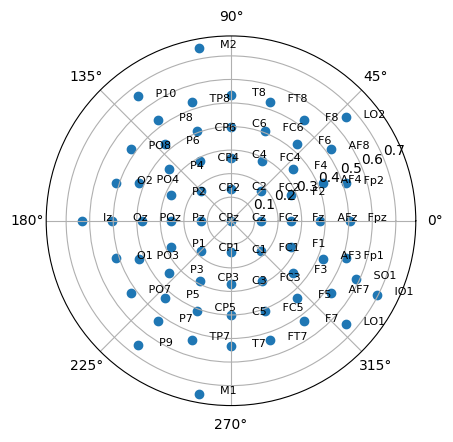

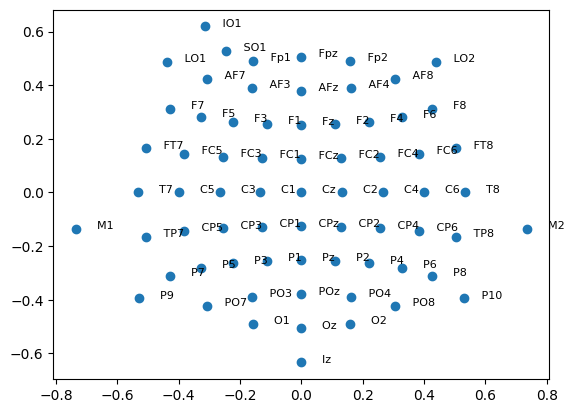

In [23]:
# Plot in polar coordinates
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(electrodeLocs['radianTheta'], electrodeLocs['radius'])
for i, row in electrodeLocs.iterrows():
    ax.text(row['radianTheta'], row['radius'], row['electrode'], fontsize=8)

# Plot in Cartesian coordinates
fig, ax = plt.subplots()
ax.scatter(electrodeLocs['x'], electrodeLocs['y'])
for i, row in electrodeLocs.iterrows():
    ax.text(row['x'], row['y'], row['electrode'], fontsize=8)

plt.show()

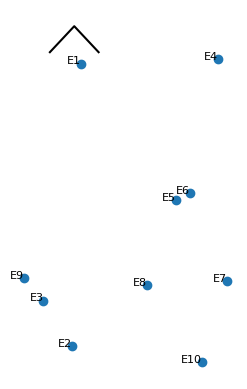

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to create a circle (head shape)
def circle_fun(center=(0, 0), diameter=1, npoints=100):
    r = diameter / 2
    theta = np.linspace(0, 2*np.pi, npoints)
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return x, y

# Function to create a nose
def nose_fun():
    return np.array([-0.075, 0, 0.075]), np.array([0.495, 0.575, 0.495])

# Sample electrode locations (replace with your actual data)
electrode_locs = pd.DataFrame({
    'x': np.random.rand(10) - 0.5,
    'y': np.random.rand(10) - 0.5,
    'electrode': [f'E{i}' for i in range(1, 11)]
})

# Create the head shape and nose
head_x, head_y = circle_fun(center=(0, 0), diameter=round(max(electrode_locs['x'])), npoints=100)
nose_x, nose_y = nose_fun()

# Create the plot
fig, ax = plt.subplots()
ax.plot(head_x, head_y, color='black')  # Draw head shape
ax.plot(nose_x, nose_y, color='black')  # Draw nose
ax.scatter(electrode_locs['x'], electrode_locs['y'])  # Plot electrode points

# Add labels for electrodes
for _, row in electrode_locs.iterrows():
    ax.text(row['x'], row['y'], row['electrode'], fontsize=8, ha='right')

# Set plot properties
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Hide axes
plt.show()


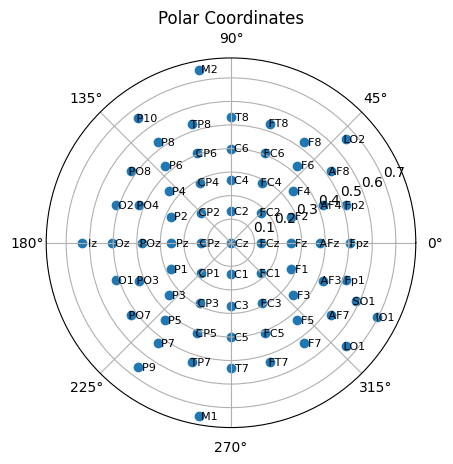

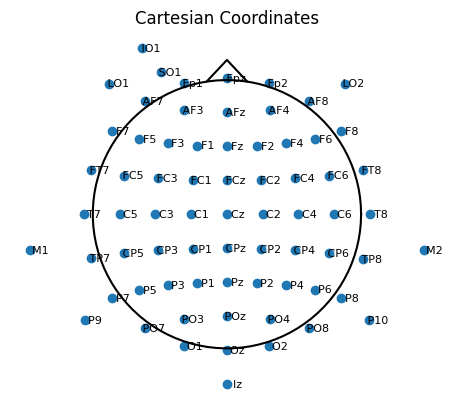

In [27]:
# Read data from GitHub repository
topotest_url = "https://raw.githubusercontent.com/craddm/ExploringERPs/master/topographyTest.csv"
electrode_locs_url = "https://raw.githubusercontent.com/craddm/ExploringERPs/master/biosemi70elecs.loc"

topotest = pd.read_csv(topotest_url)
topotest = topotest.melt(id_vars=['Times'], var_name='electrode', value_name='amplitude')
topotest['amplitude'] = topotest['amplitude'].astype(float)

electrode_locs = pd.read_csv(electrode_locs_url, sep="\t", header=None, names=["chanNo", "theta", "radius", "electrode"])
electrode_locs['radianTheta'] = np.radians(electrode_locs['theta'])
electrode_locs['x'] = electrode_locs['radius'] * np.sin(electrode_locs['radianTheta'])
electrode_locs['y'] = electrode_locs['radius'] * np.cos(electrode_locs['radianTheta'])

# Define the plotting function
def plot_electrodes(electrode_locs):
    # Create polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(electrode_locs['radianTheta'], electrode_locs['radius'])
    for i, row in electrode_locs.iterrows():
        ax.text(row['radianTheta'], row['radius'], row['electrode'], fontsize=8, ha='center', va='center')
    ax.set_aspect(1)
    plt.title('Polar Coordinates')

    # Create Cartesian plot
    fig, ax = plt.subplots()
    ax.scatter(electrode_locs['x'], electrode_locs['y'])
    for i, row in electrode_locs.iterrows():
        ax.text(row['x'], row['y'], row['electrode'], fontsize=8, ha='center', va='center')
    ax.set_aspect(1)
    plt.title('Cartesian Coordinates')
    plt.grid(False)
    plt.axis('off')

    # Plot head shape
    diameter = 1  # Adjust diameter as needed
    npoints = 100
    theta = np.linspace(0, 2 * np.pi, npoints)
    head_x = diameter / 2 * np.cos(theta)
    head_y = diameter / 2 * np.sin(theta)
    ax.plot(head_x, head_y, 'k')

    # Plot nose
    nose_x = [-0.075, 0, 0.075]
    nose_y = [0.495, 0.575, 0.495]
    ax.plot(nose_x, nose_y, 'k')

    plt.show()

# Execute the plotting function
plot_electrodes(electrode_locs)

In [30]:
print(electrode_locs.head())

   chanNo   theta   radius electrode  radianTheta         x         y
0       1 -17.926  0.51499       Fp1    -0.312868 -0.158508  0.489990
1       2 -35.892  0.52233       AF7    -0.626434 -0.306221  0.423152
2       3 -22.461  0.42113       AF3    -0.392018 -0.160895  0.389183
3       4 -23.493  0.27903        F1    -0.410030 -0.111232  0.255901
4       5 -39.947  0.34459        F3    -0.697207 -0.221254  0.264176


In [31]:
allData = pd.merge(topotest, electrodeLocs, on="electrode", how="left")

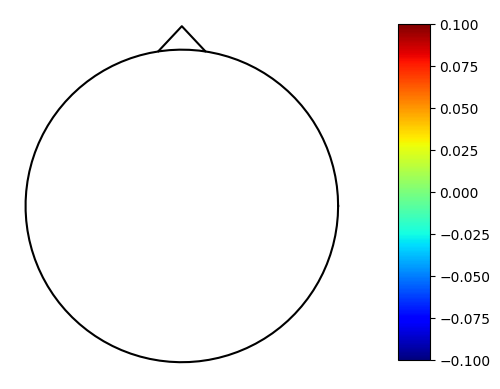

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming singleTimepoint and jet are already defined
# Define the head shape and nose coordinates
npoints = 100
theta = np.linspace(0, 2 * np.pi, npoints)
head_x = 0.5 * np.cos(theta)  # Radius of 0.5 for the head
head_y = 0.5 * np.sin(theta)

nose_x = [-0.075, 0, 0.075]
nose_y = [0.495, 0.575, 0.495]

# Create plot with space for colorbar
fig, ax = plt.subplots()
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Position for the colorbar

# Draw the head shape, nose, and electrode points
ax.plot(head_x, head_y, 'k', linewidth=1.5)  # Head shape
sc = ax.scatter(singleTimepoint['x'], singleTimepoint['y'], c=singleTimepoint['amplitude'], cmap='jet', s=3)  # Electrode points
ax.plot(nose_x, nose_y, 'k', linewidth=1.5)  # Nose

# Other plot settings
ax.grid(False)
ax.axis('off')
ax.set_aspect('equal')

# Create and display the colorbar
plt.colorbar(sc, cax=cax, orientation='vertical')

plt.show()


In [40]:
## create the list of possible channel pairs
sample_corr_df = pd.pivot_table(S2_nm_sample_df[S2_nm_sample_df['subject identifier'] == 'a'], values='sensor value', index='sample num', columns='sensor position').corr()

list_of_pairs = []
j = 0
for column in sample_corr_df.columns:
    j += 1
    for i in range(j, len(sample_corr_df)):
        if column != sample_corr_df.index[i]:
            temp_pair = [column + '-' + sample_corr_df.index[i]]
            list_of_pairs.append(temp_pair)

NameError: name 'S2_nm_sample_df' is not defined

In [41]:
stimulus = 'S2 nomatch'
S2_nm_sample_df = sample_data(stimulus=stimulus, random_id=1)

In [42]:
plot_3dSurface_and_heatmap(stimulus=stimulus, group='a', df=S2_nm_sample_df)

In [ ]:
## create the list of possible channel pairs
sample_corr_df = pd.pivot_table(S2_nm_sample_df[S2_nm_sample_df['subject identifier'] == 'a'], values='sensor value', index='sample num', columns='sensor position').corr()

list_of_pairs = []
j = 0
for column in sample_corr_df.columns:
    j += 1
    for i in range(j, len(sample_corr_df)):
        if column != sample_corr_df.index[i]:
            temp_pair = [column + '-' + sample_corr_df.index[i]]
            list_of_pairs.append(temp_pair)